We use google colab to implement our langauge Identifier.     

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Importing libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import itertools
import re
import codecs
import string
import pickle
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics

### 2. Load dataset
To train the model, we use the text data from the famous [European Parliament Proceedings Parallel Corpus](https://www.statmt.org/europarl/). For our convenience, we use just the following four langauges to train and test our Language Identification system: English, German, French and Spanish.



In [ ]:
# English data

english_data = pd.read_csv("/content/drive/MyDrive/Language_Detection/data/europarl-v7.de-en.en", "ut-8", header=None, names=["English"])
english_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,English
0,Resumption of the session
1,I declare resumed the session of the European ...
2,"Although, as you will have seen, the dreaded '..."
3,You have requested a debate on this subject in...
4,"In the meantime, I should like to observe a mi..."


In [ ]:
# German data
german_data = pd.read_csv("/content/drive/MyDrive/Language_Detection/data/europarl-v7.de-en.de", "utf-8", header=None, names=["German"])
german_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,German
0,Wiederaufnahme der Sitzungsperiode
1,"Ich erkläre die am Freitag, dem 17. Dezember u..."
2,"Wie Sie feststellen konnten, ist der gefürchte..."
3,Im Parlament besteht der Wunsch nach einer Aus...
4,Heute möchte ich Sie bitten - das ist auch der...


In [ ]:
# Spanish data

spanish_data = pd.read_csv("/content/drive/MyDrive/Language_Detection/data/europarl-v7.es-en.es", "utf-8", header=None, names=["Spanish"])
spanish_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Spanish
0,Reanudación del período de sesiones
1,Declaro reanudado el período de sesiones del P...
2,"Como todos han podido comprobar, el gran ""efec..."
3,Sus Señorías han solicitado un debate sobre el...
4,"A la espera de que se produzca, de acuerdo con..."


In [ ]:
# French data

french_data = pd.read_csv("/content/drive/MyDrive/Language_Detection/data/europarl-v7.fr-en.fr", "utf-8", header=None, names=["French"])
french_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,French
0,Reprise de la session
1,Je déclare reprise la session du Parlement eur...
2,"Comme vous avez pu le constater, le grand ""bog..."
3,Vous avez souhaité un débat à ce sujet dans le...
4,"En attendant, je souhaiterais, comme un certai..."


### 3. Data Preprocessing

We preprocess our data by removing the unwanted characters and punctuations. After tokenizing a sentence into words, we convert all the text into lower case. Then remove stopwords, numerical values and punctuations.

In [ ]:
for character in string.punctuation:
    print(character, end = ' ')
translate_table = dict((ord(character), None) for character in string.punctuation)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~ 

In [ ]:
# Cleaning english dataset
data_eng = []
lang_eng = []

for i, line in english_data.iterrows():
    line = line['English']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_eng.append(line)
        lang_eng.append("English")

In [ ]:
# Cleaning german dataset
data_ger = []
lang_ger = []

for i, line in german_data.iterrows():
    line = line['German']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_ger.append(line)
        lang_ger.append("German")


In [ ]:
# Cleaning spanish dataset
data_esp = []
lang_esp = []

for i, line in spanish_data.iterrows():
    line = line['Spanish']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_esp.append(line)
        lang_esp.append("Spanish")


In [ ]:
# Cleaning french dataset
data_fre = []
lang_fre = []

for i, line in french_data.iterrows():
    line = line['French']
    if len(line) !=0:
        line = line.lower()
        line = re.sub(r"\d+", "", line)
        line = line.translate(translate_table)
        data_fre.append(line)
        lang_fre.append("French")

### 4. Transforming the data into a single dataset

In [ ]:
df = pd.DataFrame({
    "Text" : data_eng+data_ger+data_esp+data_fre,
    "Language" : lang_eng+lang_ger+lang_esp+lang_fre
})

print(df.shape)

(7796133, 2)


In [ ]:
df.head()

,Text,Language
0,resumption of the session,English
1,i declare resumed the session of the european ...,English
2,although as you will have seen the dreaded mil...,English
3,you have requested a debate on this subject in...,English
4,in the meantime i should like to observe a min...,English


In [ ]:
df.tail()

,Text,Language
7796128,je me permettrai même bien quils soient absent...,French
7796129,je ne rouvrirai pas le débat sur le millénaire...,French
7796130,interruption de la session,French
7796131,je déclare interrompue la session du parlement...,French
7796132,la séance est levée à h,French


In [ ]:
df['Language'].value_counts()

French     2004791
Spanish    1962213
German     1917286
English    1911843
Name: Language, dtype: int64

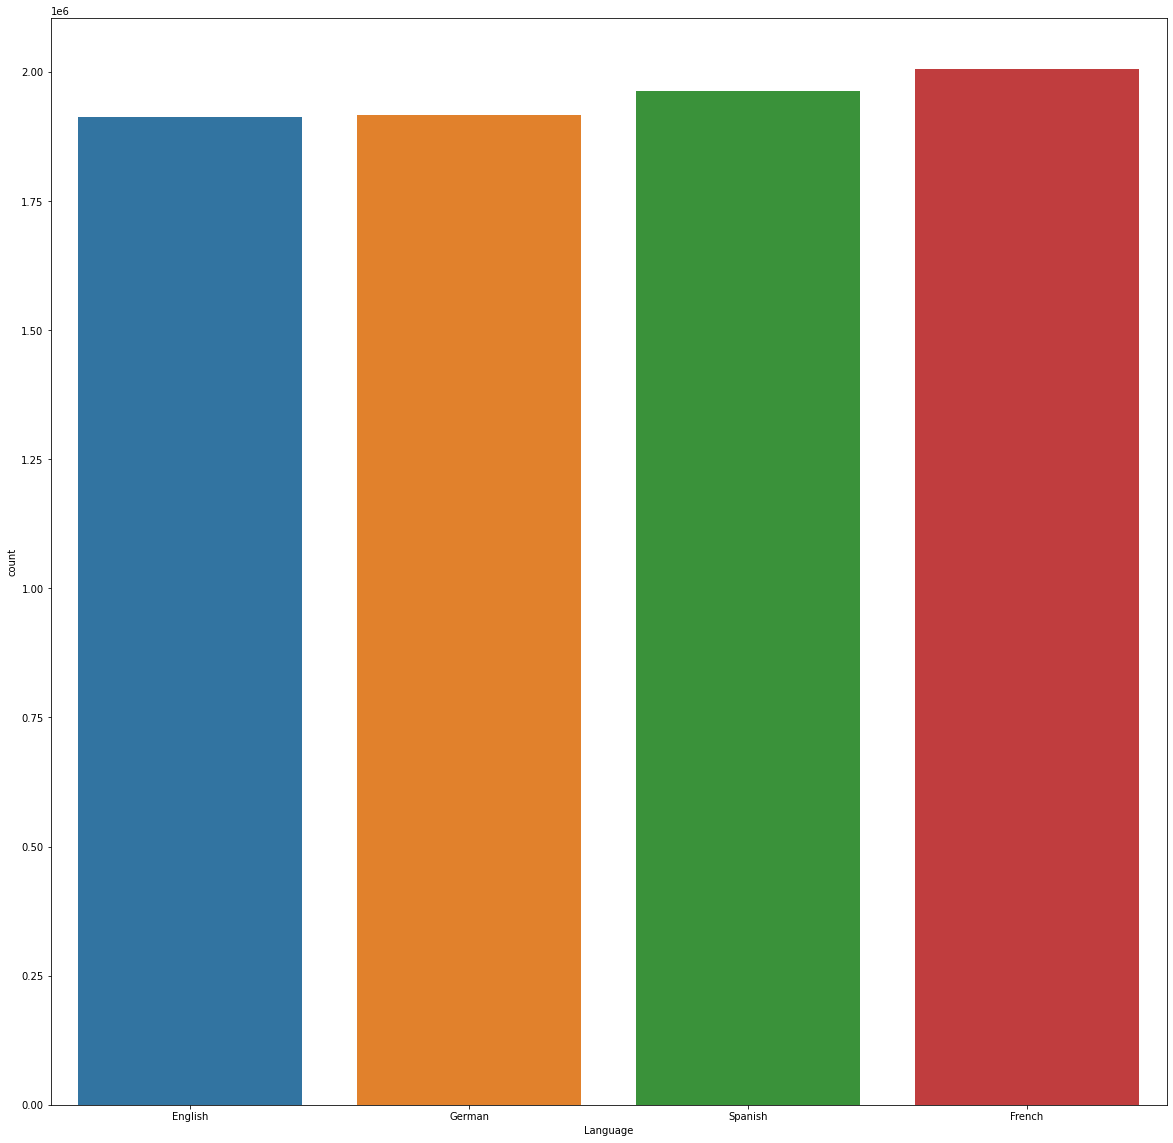

In [ ]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df)

### 5. Splitting the dataset

* Splitting the dataset into Independent and Dependent variables

In [ ]:
x = df.iloc[:,0] # Independent Variable
y = df.iloc[:,1] # Dependent Variable

In [ ]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [ ]:
x.head()

0                            resumption of the session
1    i declare resumed the session of the european ...
2    although as you will have seen the dreaded mil...
3    you have requested a debate on this subject in...
4    in the meantime i should like to observe a min...
Name: Text, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Applying TF-IDF Vectorizer and training the model

* `ngram_range` : It collets one , one two, one two three words 
* `analyzer` : We are not going word by word here we are going character by character that why we have used **char**.

In [ ]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')
print(vectorizer)


TfidfVectorizer(analyzer='char', ngram_range=(1, 3))


In [ ]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [ ]:
pipe_mnb.fit(x_train, y_train)

In [ ]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [ ]:
pipe_lr.fit(x_train, y_train)

## Model Prediction for Logistic Regression

---



In [ ]:
lr_predicted = pipe_lr.predict(x_test)

## Model evaluation for Logistic Regression

In [ ]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

## Model Prediction for MultinomialNB

In [ ]:
mnb_predicted = pipe_mnb.predict(x_test)

## Model Evaluation for MultinomialNB

In [ ]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

## Evaluation matrix for Logistic Regression

In [ ]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['ENG', 'GER', 'ESP', 'FRA'])

In [ ]:
# saving the model. The model can be further loaded and be used to identify the language of the document (any of the above 4 langauges).
lrfile = open('lrmodel.pckl', 'wb')
pickle.dump(pipe_lr, lrfile)
lrfile.close()